# Cargue de datos

In [3]:
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import os
from IPython.core.display import display, HTML

C:\Users\henry\AppData\Local\Temp\ipykernel_26984\1582991288.py:6: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [1]:
data_path = "C:/Users/henry/Desktop/python/jbook_rna/datos/Single-cell RNASeq data from Mouse Brain"
data_path2 = "C:/Users/henry/Desktop/python/jbook_rna/datos/Theory - Intro to single-cell RNAseq Images"

In [ ]:
glioblastoma_norm_file = os.path.join(data_path, "glioblastoma_normalized.h5ad")
glioblastoma_raw_file = os.path.join(data_path, "glioblastoma_raw.h5ad")
pbmc3k_file = os.path.join(data_path, "pbmc3k.h5ad")

adata_glioblastoma_norm = sc.read_h5ad(glioblastoma_norm_file)
adata_glioblastoma_raw = sc.read_h5ad(glioblastoma_raw_file)
adata_pbmc3k = sc.read_h5ad(pbmc3k_file)

### Observar conjunto de datos
Los archivos H5AD son un formato utilizado en bioinformática para almacenar datos de expresión génica de células individuales en el framework Scanpy, basado en AnnData.


In [ ]:
display(HTML("<h3>Metadatos de células:</h3>"))
display(HTML(adata_glioblastoma_norm.obs.head().to_html())) 

,disease_state,plate_id,tissue,patient_id,cell_type,neoplastic_state,diagnosis,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,n_counts,n_genes
index,,,,,,,,,,,,,,,,,
GSM2243439,diagnosis: glioblastoma,plate id: 1001000173,tissue: Tumor,patient id: BT_S2,cell type: Neoplastic,neoplastic: Neoplastic,Neoplastic,1341,7.201916,159262.312500,11.978314,65.554424,76.898016,89.034835,98.116145,159262.312500,1341
GSM2243444,diagnosis: glioblastoma,plate id: 1001000173,tissue: Tumor,patient id: BT_S2,cell type: Neoplastic,neoplastic: Neoplastic,Neoplastic,1456,7.284135,326321.875000,12.695642,77.530281,83.443820,90.526005,98.158822,326321.875000,1456
GSM2243445,diagnosis: glioblastoma,plate id: 1001000173,tissue: Tumor,patient id: BT_S2,cell type: Neoplastic,neoplastic: Neoplastic,Neoplastic,1849,7.522941,196996.859375,12.190948,50.919931,59.767944,70.261123,85.793566,196996.859375,1849
GSM2243452,diagnosis: glioblastoma,plate id: 1001000173,tissue: Tumor,patient id: BT_S2,cell type: Neoplastic,neoplastic: Neoplastic,Neoplastic,1788,7.489412,208278.578125,12.246636,45.863893,56.620505,68.793036,87.116435,208278.578125,1788
GSM2243455,diagnosis: glioblastoma,plate id: 1001000173,tissue: Tumor,patient id: BT_S2,cell type: Oligodendrocyte,neoplastic: Regular,Oligodendrocyte,2377,7.774015,288928.750000,12.573939,53.801413,62.445690,72.430413,87.809547,288928.750000,2377


Describir las varaobles del conjunto de datos

### Descripción de las Variables en `adata_glioblastoma_norm.obs`

| Variable                          | Descripción |
|-----------------------------------|-------------|
| **`disease_state`**              | Estado de la enfermedad del paciente (ej. sano, glioblastoma, etc.). |
| **`plate_id`**                    | Identificador de la placa utilizada en la secuenciación de células. |
| **`tissue`**                      | Tipo de tejido del que se extrajo la muestra (ej. tumor, sangre, etc.). |
| **`patient_id`**                  | Identificador único del paciente al que pertenece la muestra. |
| **`cell_type`**                   | Tipo de célula identificada en la muestra (ej. Neoplastic, T cells, etc.). |
| **`neoplastic_state`**            | Indica si la célula es neoplásica (cancerosa) o no. |
| **`diagnosis`**                   | Diagnóstico clínico asociado a la muestra (ej. glioblastoma, sano, etc.). |
| **`n_genes_by_counts`**           | Número de genes detectados en la célula en función de la cantidad de lecturas. |
| **`log1p_n_genes_by_counts`**     | Logaritmo natural de `n_genes_by_counts` más uno, utilizado para normalización. |
| **`total_counts`**                | Número total de lecturas (counts) asignadas a la célula. |
| **`log1p_total_counts`**          | Logaritmo natural de `total_counts` más uno, para normalización. |
| **`pct_counts_in_top_50_genes`**  | Porcentaje de las cuentas totales que provienen de los 50 genes más expresados. |
| **`pct_counts_in_top_100_genes`** | Porcentaje de las cuentas totales que provienen de los 100 genes más expresados. |
| **`pct_counts_in_top_200_genes`** | Porcentaje de las cuentas totales que provienen de los 200 genes más expresados. |
| **`pct_counts_in_top_500_genes`** | Porcentaje de las cuentas totales que provienen de los 500 genes más expresados. |
| **`n_counts`**                    | Número total de cuentas en la célula (puede ser redundante con `total_counts`). |
| **`n_genes`**                     | Número total de genes detectados en la célula. |



In [23]:
adata_glioblastoma_norm.obs.columns.tolist()

['disease_state',
 'plate_id',
 'tissue',
 'patient_id',
 'cell_type',
 'neoplastic_state',
 'diagnosis',
 'n_genes_by_counts',
 'log1p_n_genes_by_counts',
 'total_counts',
 'log1p_total_counts',
 'pct_counts_in_top_50_genes',
 'pct_counts_in_top_100_genes',
 'pct_counts_in_top_200_genes',
 'pct_counts_in_top_500_genes',
 'n_counts',
 'n_genes']

contendio de las celulas h5ad

numero de celulas vs nuemro de variables

In [15]:
adata_glioblastoma_norm.obs.shape

(1651, 17)

In [16]:
adata_glioblastoma_norm.obs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1651 entries, GSM2243439 to GSM2247071
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   disease_state                1651 non-null   category
 1   plate_id                     1651 non-null   category
 2   tissue                       1651 non-null   category
 3   patient_id                   1651 non-null   category
 4   cell_type                    1651 non-null   category
 5   neoplastic_state             1651 non-null   category
 6   diagnosis                    1651 non-null   category
 7   n_genes_by_counts            1651 non-null   int64   
 8   log1p_n_genes_by_counts      1651 non-null   float64 
 9   total_counts                 1651 non-null   float32 
 10  log1p_total_counts           1651 non-null   float32 
 11  pct_counts_in_top_50_genes   1651 non-null   float64 
 12  pct_counts_in_top_100_genes  1651 non-null   float64

In [22]:
adata_glioblastoma_norm.obs.describe()

,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,n_counts,n_genes
count,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000
mean,1341.784979,7.177672,156180.015625,11.854759,54.477025,68.027822,82.394250,95.983677,156180.015625,1341.784979
std,300.774693,0.223335,71629.671875,0.462496,10.670330,10.529468,9.206988,3.974234,71629.671875,300.774693
min,758.000000,6.632002,50324.871094,10.826275,28.037418,40.053208,54.781912,76.990205,50324.871094,758.000000
25%,1116.000000,7.018402,100596.058594,11.518878,46.644485,60.524699,75.820377,94.792221,100596.058594,1116.000000
50%,1315.000000,7.182352,144781.062500,11.882985,54.762902,68.990140,84.223608,97.434397,144781.062500,1315.000000
75%,1538.500000,7.339213,200567.851562,12.208913,61.652335,75.890519,89.952606,98.702477,200567.851562,1538.500000
max,2513.000000,7.829630,514206.531250,13.150382,91.136775,94.251968,98.651389,99.881018,514206.531250,2513.000000


Gráficas descriptivas

desease_state

In [46]:
adata_glioblastoma_norm.obs['disease_state'].unique()

['diagnosis: glioblastoma']
Categories (1, object): ['diagnosis: glioblastoma']

In [47]:
adata_glioblastoma_norm.obs['cell_type'].unique()

['cell type: Neoplastic', 'cell type: Oligodendrocyte', 'cell type: Immune cell', 'cell type: Vascular', 'cell type: OPC', 'cell type: Astocyte', 'cell type: Neuron']
Categories (7, object): ['cell type: Astocyte', 'cell type: Immune cell', 'cell type: Neoplastic', 'cell type: Neuron', 'cell type: OPC', 'cell type: Oligodendrocyte', 'cell type: Vascular']

In [48]:
adata_glioblastoma_norm.obs['tissue'].unique()

['tissue: Tumor', 'tissue: Periphery']
Categories (2, object): ['tissue: Periphery', 'tissue: Tumor']

'neoplastic: Neoplastic': Indica que la célula es neoplásica (cancerosa).
'neoplastic: Regular': Indica que la célula es normal o no cancerosa.

In [49]:
adata_glioblastoma_norm.obs['neoplastic_state'].unique()

['neoplastic: Neoplastic', 'neoplastic: Regular']
Categories (2, object): ['neoplastic: Neoplastic', 'neoplastic: Regular']

In [ ]:
adata_glioblastoma_norm.obs['diagnosis'].unique()

['Neoplastic', 'Oligodendrocyte', 'Immune cell', 'Vascular', 'OPC', 'Astocyte', 'Neuron']
Categories (7, object): ['Astocyte', 'Immune cell', 'Neoplastic', 'Neuron', 'OPC', 'Oligodendrocyte', 'Vascular']

## 📌 Significado de las categorías en `diagnosis`

| **Categoría**       | **Significado** |
|----------------------|----------------|
| **Neoplastic**      | Células cancerosas o tumorales en el glioblastoma. Representan células que han sufrido alteraciones genéticas y proliferan de manera descontrolada. |
| **Oligodendrocyte** | Oligodendrocitos, células del sistema nervioso central responsables de producir mielina, la sustancia que aísla los axones neuronales. |
| **Immune cell**     | Células del sistema inmune, como macrófagos y linfocitos, que pueden estar infiltradas en el tumor y desempeñar un papel en la respuesta inmunológica contra el cáncer. |
| **Vascular**       | Células endoteliales y pericitos que forman los vasos sanguíneos en el cerebro. Su presencia en tumores puede estar relacionada con la angiogénesis, es decir, la formación de nuevos vasos sanguíneos para nutrir el tumor. |
| **OPC (Oligodendrocyte Precursor Cells)** | Células progenitoras de oligodendrocitos, un tipo de célula madre del sistema nervioso que puede diferenciarse en oligodendrocitos maduros. Se cree que pueden estar implicadas en la regeneración celular y, en algunos casos, en la progresión tumoral. |
| **Astrocyte**      | Astrocitos, células gliales que brindan soporte estructural y funcional a las neuronas. Pueden desempeñar un papel en la comunicación neuronal y la respuesta a lesiones cerebrales. |
| **Neuron**         | Neuronas, las principales células funcionales del sistema nervioso central. Su presencia en el tumor puede deberse a la contaminación de tejido sano en la muestra. |

### 📊 Importancia en el análisis
- La proporción de células **neoplásicas** puede indicar la agresividad del glioblastoma.
- La presencia de células del **sistema inmune** puede dar pistas sobre la respuesta del organismo al tumor.
- La cantidad de células **vasculares** puede sugerir qué tan desarrollado está el sistema de irrigación del tumor.
- Las **OPC y oligodendrocitos** pueden estar implicados en procesos de reparación o diferenciación celular en el contexto tumoral.

✔ **Este análisis es clave para entender la heterogeneidad celular en glioblastoma y su potencial respuesta a tratamientos.** 🚀


numero de genes por conteo

In [51]:
desc_stats = adata_glioblastoma_norm.obs["n_genes_by_counts"].describe()
print("📊 Resumen Estadístico de 'n_genes_by_counts':\n", desc_stats)

📊 Resumen Estadístico de 'n_genes_by_counts':
 count    1651.000000
mean     1341.784979
std       300.774693
min       758.000000
25%      1116.000000
50%      1315.000000
75%      1538.500000
max      2513.000000
Name: n_genes_by_counts, dtype: float64


conte d egenes

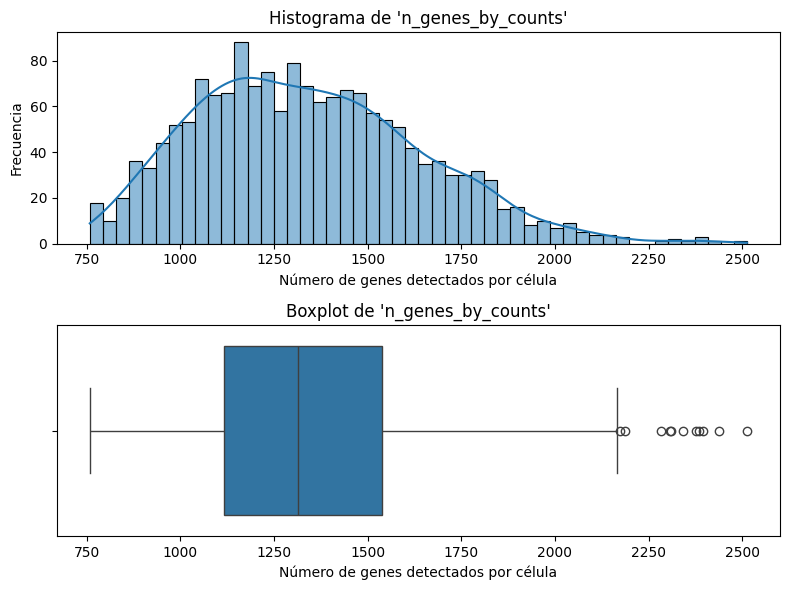

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(8, 6))

# Histograma
sns.histplot(adata_glioblastoma_norm.obs["n_genes_by_counts"], bins=50, kde=True, ax=axes[0])
axes[0].set_title("Histograma de 'n_genes_by_counts'")
axes[0].set_xlabel("Número de genes detectados por célula")
axes[0].set_ylabel("Frecuencia")

# Boxplot
sns.boxplot(x=adata_glioblastoma_norm.obs["n_genes_by_counts"], ax=axes[1])
axes[1].set_title("Boxplot de 'n_genes_by_counts'")
axes[1].set_xlabel("Número de genes detectados por célula")

# Ajustar diseño
plt.tight_layout()
plt.show()

log1p_numeor de genes por conyteo

In [57]:
desc_stats = adata_glioblastoma_norm.obs["log1p_n_genes_by_counts"].describe()
print(desc_stats)

count    1651.000000
mean        7.177672
std         0.223335
min         6.632002
25%         7.018402
50%         7.182352
75%         7.339213
max         7.829630
Name: log1p_n_genes_by_counts, dtype: float64


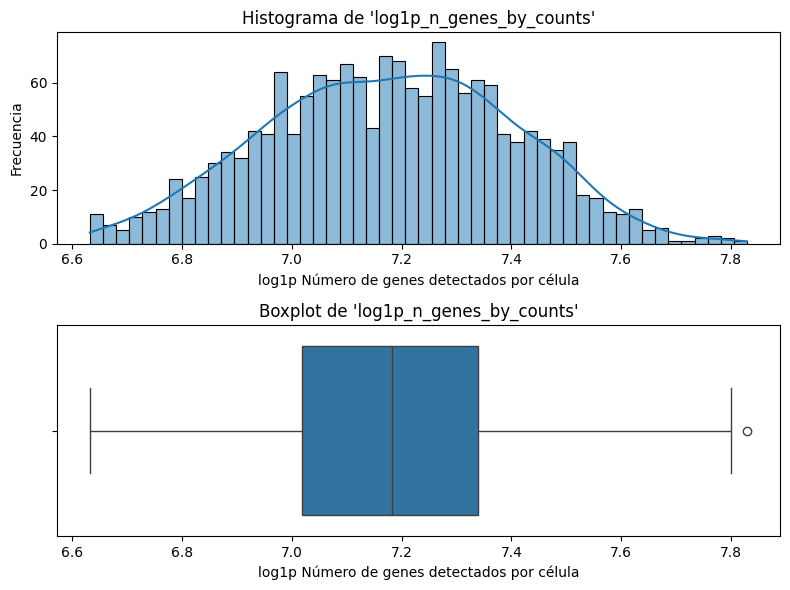

In [ ]:
# Crear figura con dos gráficos (histograma y boxplot)
fig, axes = plt.subplots(2, 1, figsize=(8, 6))

# Histograma
sns.histplot(adata_glioblastoma_norm.obs["log1p_n_genes_by_counts"], bins=50, kde=True, ax=axes[0])
axes[0].set_title("Histograma de 'log1p_n_genes_by_counts'")
axes[0].set_xlabel("log1p Número de genes detectados por célula")
axes[0].set_ylabel("Frecuencia")

# Boxplot
sns.boxplot(x=adata_glioblastoma_norm.obs["log1p_n_genes_by_counts"], ax=axes[1])
axes[1].set_title("Boxplot de 'log1p_n_genes_by_counts'")
axes[1].set_xlabel("log1p Número de genes detectados por célula")

# Ajustar diseño
plt.tight_layout()
plt.show()

conteo porcentual de genes

# 📌 Descripción de las Variables  

| **Variable** | **Descripción** |
|-------------|----------------|
| `pct_counts_in_top_50_genes` | **Porcentaje de cuentas en los 50 genes más abundantes**. Representa el porcentaje del total de cuentas en una célula que provienen de los 50 genes más expresados. |
| `pct_counts_in_top_100_genes` | **Porcentaje de cuentas en los 100 genes más abundantes**. Similar al anterior, pero considerando los 100 genes con mayor expresión. |
| `pct_counts_in_top_200_genes` | **Porcentaje de cuentas en los 200 genes más abundantes**. Indica cuánto del total de la expresión celular se debe a los 200 genes más expresados. |
| `pct_counts_in_top_500_genes` | **Porcentaje de cuentas en los 500 genes más abundantes**. Muestra la concentración de la expresión en los 500 genes principales. |

---

## 🔎 Interpretación  
- Estas variables indican **qué tan concentrada está la expresión génica** en un subconjunto de genes.  
- Valores altos sugieren que **pocos genes dominan la expresión en una célula**, lo que puede indicar que ciertos genes son clave en un tipo celular específico.  
- Valores bajos indican una **distribución más uniforme** de la expresión en muchos genes.  
- Pueden ayudar a detectar **sesgos en la expresión** o identificar tipos celulares con perfiles de expresión distintivos.  


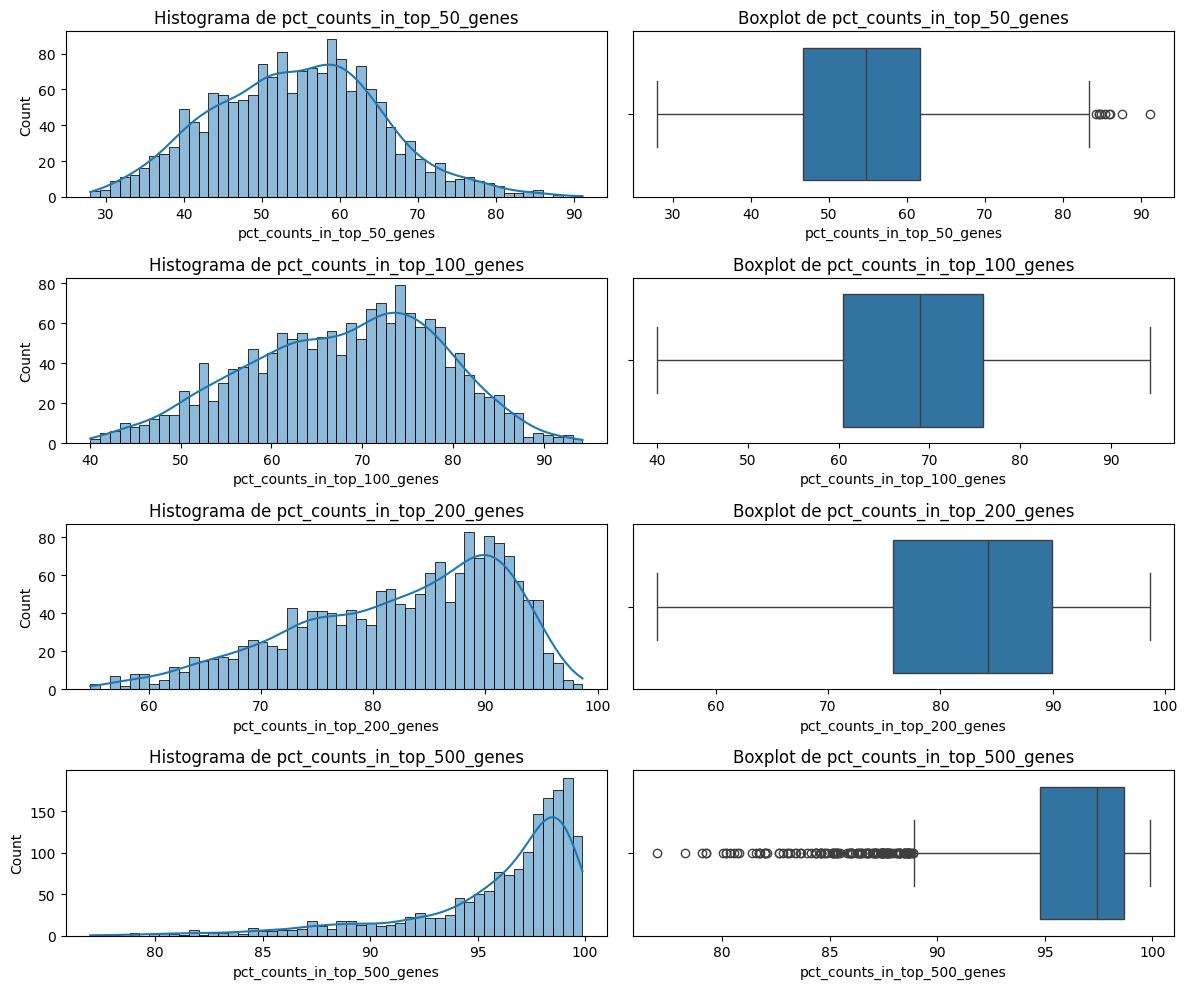

In [60]:
# Lista de variables a analizar
variables = [
    "pct_counts_in_top_50_genes",
    "pct_counts_in_top_100_genes",
    "pct_counts_in_top_200_genes",
    "pct_counts_in_top_500_genes"
]

# Crear figura con subgráficos
fig, axes = plt.subplots(4, 2, figsize=(12, 10))

for i, var in enumerate(variables):
    # Histograma
    sns.histplot(adata_glioblastoma_norm.obs[var], bins=50, kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f"Histograma de {var}")
    
    # Boxplot
    sns.boxplot(x=adata_glioblastoma_norm.obs[var], ax=axes[i, 1])
    axes[i, 1].set_title(f"Boxplot de {var}")

# Ajustar diseño
plt.tight_layout()
plt.show()

numero de celulas y genes

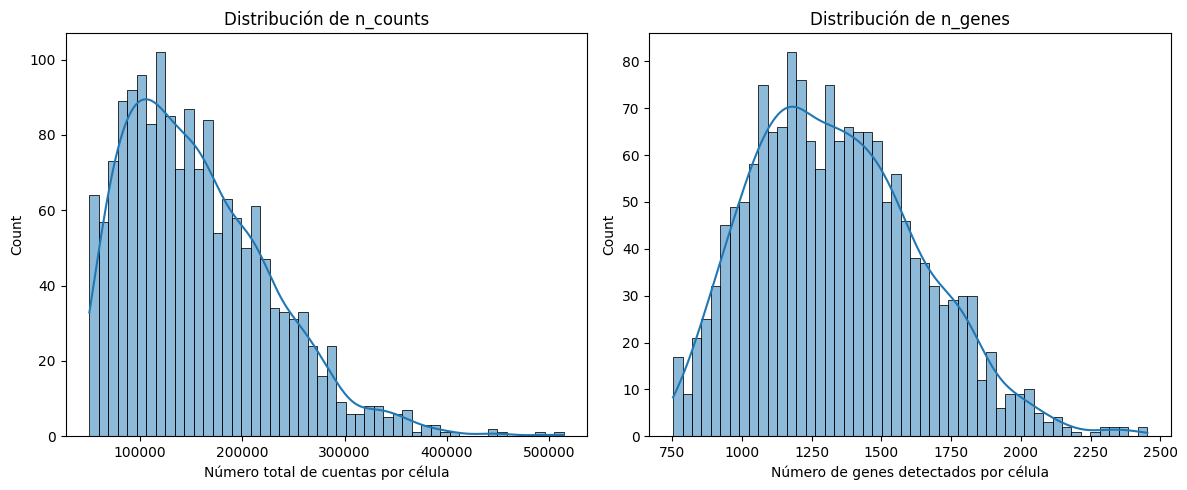

In [61]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histograma de n_counts
sns.histplot(adata_glioblastoma_norm.obs["n_counts"], bins=50, kde=True, ax=axes[0])
axes[0].set_title("Distribución de n_counts")
axes[0].set_xlabel("Número total de cuentas por célula")

# Histograma de n_genes
sns.histplot(adata_glioblastoma_norm.obs["n_genes"], bins=50, kde=True, ax=axes[1])
axes[1].set_title("Distribución de n_genes")
axes[1].set_xlabel("Número de genes detectados por célula")

plt.tight_layout()
plt.show()

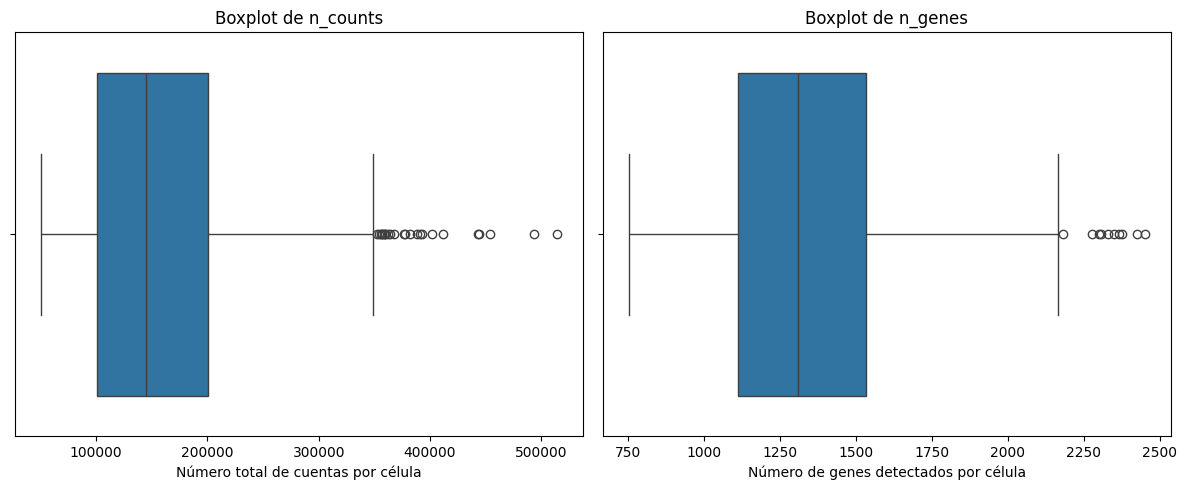

In [65]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))


sns.boxplot(x=adata_glioblastoma_norm.obs["n_counts"], ax=axes[0])
axes[0].set_title("Boxplot de n_counts")
axes[0].set_xlabel("Número total de cuentas por célula")

# Boxplot horizontal de n_genes
sns.boxplot(x=adata_glioblastoma_norm.obs["n_genes"], ax=axes[1])
axes[1].set_title("Boxplot de n_genes")
axes[1].set_xlabel("Número de genes detectados por célula")

plt.tight_layout()
plt.show()

Distribución del número de genes por estado de enfermedad
📌 Gráfico sugerido: Boxplot por categoría

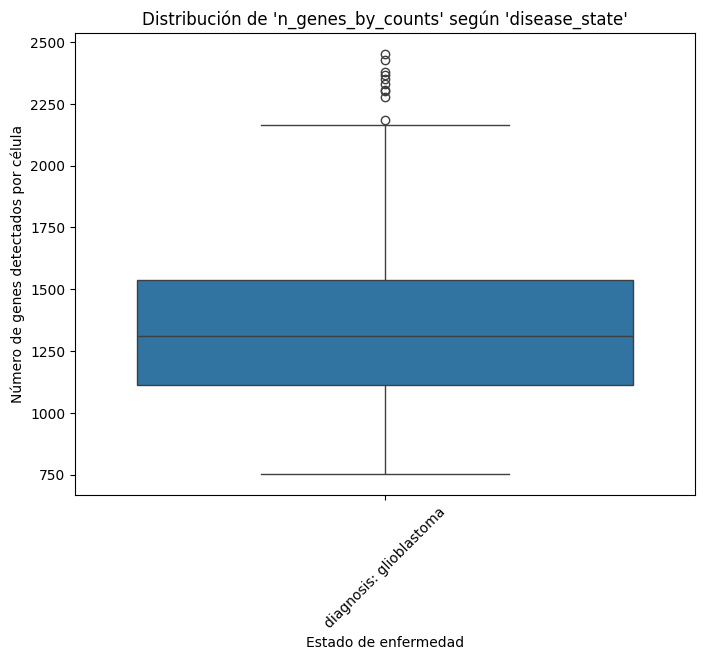

In [66]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=adata_glioblastoma_norm.obs['disease_state'],
            y=adata_glioblastoma_norm.obs['n_genes'])
plt.xlabel("Estado de enfermedad")
plt.ylabel("Número de genes detectados por célula")
plt.title("Distribución de 'n_genes_by_counts' según 'disease_state'")
plt.xticks(rotation=45)
plt.show()

#### Bivariate Analysis

numerb of cells vs tissue

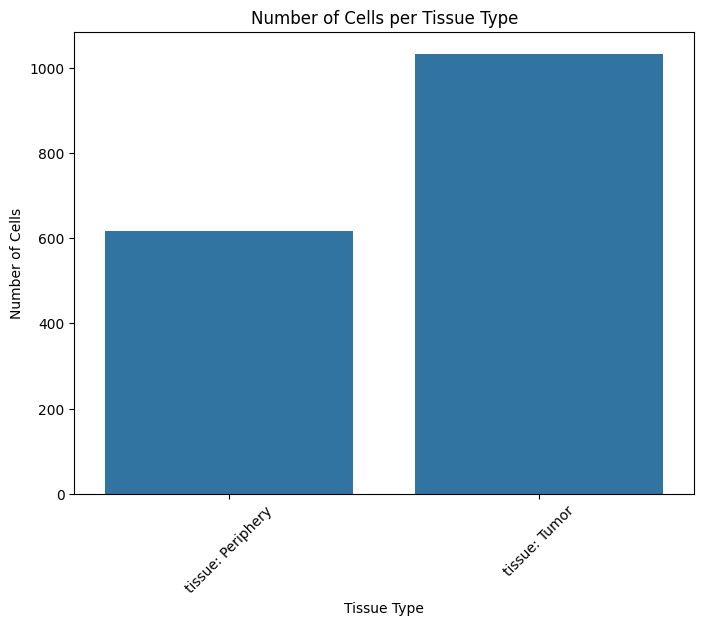

In [68]:
tissue_counts = adata_glioblastoma_norm.obs['tissue'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=tissue_counts.index, y = tissue_counts.values)
plt.xlabel('Tissue Type')
plt.ylabel('Number of Cells')
plt.title('Number of Cells per Tissue Type')
plt.xticks(rotation=45)
plt.show()


number of cells for cell_type

In [70]:
print(cell_type_counts)

cell_type
cell type: Immune cell        814
cell type: Neoplastic         490
cell type: OPC                221
cell type: Astocyte            57
cell type: Oligodendrocyte     39
cell type: Vascular            21
cell type: Neuron               9
Name: count, dtype: int64


C:\Users\henry\AppData\Local\Temp\ipykernel_26984\556676785.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cell_type_counts.index, y=cell_type_counts.values, palette="coolwarm", order=cell_type_counts.index)


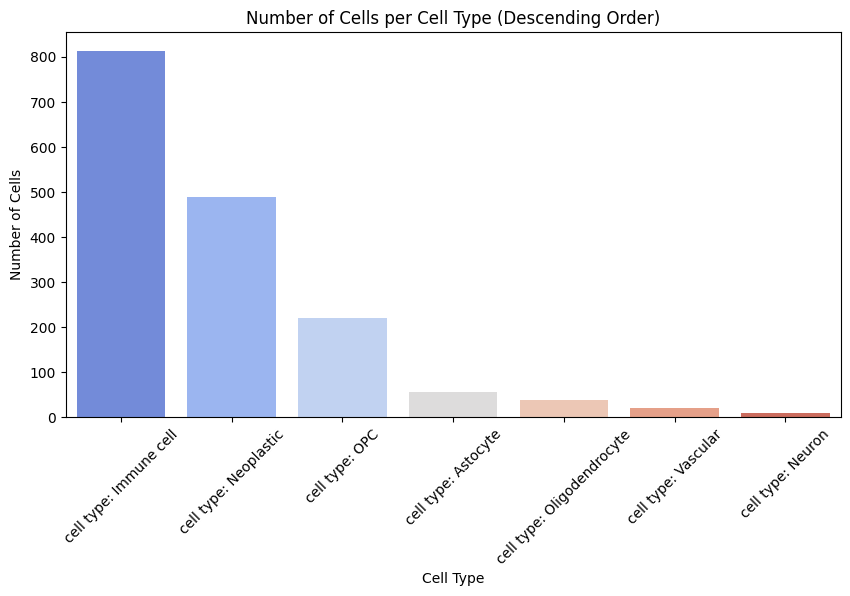

In [ ]:
cell_type_counts = adata_glioblastoma_norm.obs["cell_type"].value_counts().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=cell_type_counts.index, y=cell_type_counts.values, palette="coolwarm", order=cell_type_counts.index)

plt.xlabel("Cell Type")
plt.ylabel("Number of Cells")
plt.title("Number of Cells per Cell Type (Descending Order)")
plt.xticks(rotation=45)  
plt.show()

Number of cells per nepplastic state

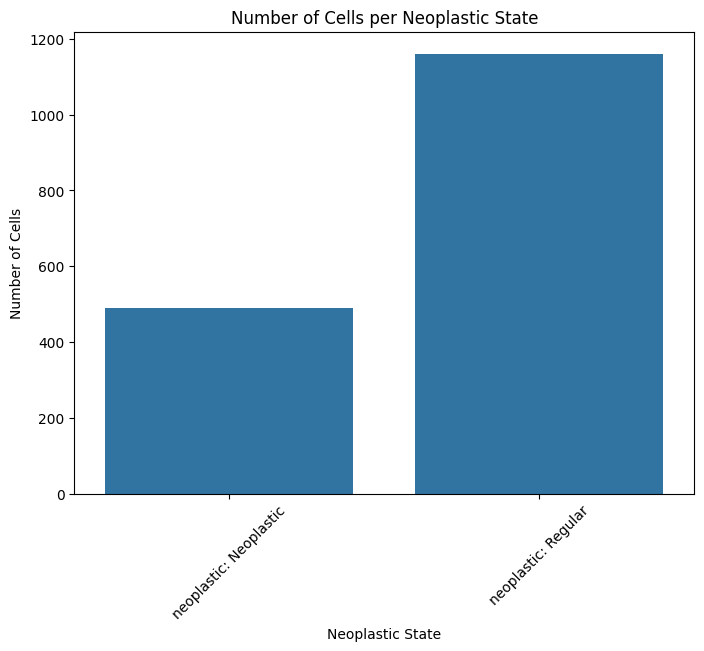

In [76]:
neoplastic_state_counts = adata_glioblastoma_norm.obs["neoplastic_state"].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=neoplastic_state_counts.index, y=neoplastic_state_counts.values)
plt.xlabel("Neoplastic State")
plt.ylabel("Number of Cells")
plt.title("Number of Cells per Neoplastic State")
plt.xticks(rotation=45)
plt.show()

### Datos genes

In [13]:
display(HTML("<h3>Metadatos de genes: </h3>"))
display(HTML(adata_glioblastoma_norm.var.head().to_html()))

,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts,n_cells,n_counts
index,,,,,,,,
ENSG00000000005,2,0.033459,0.032912,99.892067,62.000000,4.143135,2,62.000000
ENSG00000001561,245,17.581758,2.922180,86.778198,32579.000000,10.391454,236,32458.000000
ENSG00000001629,715,29.176739,3.407071,61.413923,54064.496094,10.897951,677,52530.570312
ENSG00000002587,1268,22.115810,3.140517,31.570426,40980.597656,10.620878,1166,40703.941406
ENSG00000002933,548,45.389587,3.837075,70.426336,84106.906250,11.339856,513,80978.914062


In [18]:
adata_glioblastoma_norm.var.shape

(6852, 8)

Describir las variables

## Descripción de las variables en `adata_glioblastoma_norm.var`

- **`n_cells_by_counts`**: Número de células en las que se detectó la expresión del gen (es decir, cuántas células tienen conteos mayores a cero para este gen).  
- **`mean_counts`**: Promedio de conteos de expresión para el gen en todas las células.  
- **`log1p_mean_counts`**: Promedio de conteos de expresión después de aplicar la transformación `log1p(x) = log(1 + x)`, que reduce el efecto de valores extremos.  
- **`pct_dropout_by_counts`**: Porcentaje de células en las que el gen no fue detectado (tiene un conteo de 0). Valores altos indican genes expresados en pocas células.  
- **`total_counts`**: Suma total de conteos de expresión para ese gen en todas las células.  
- **`log1p_total_counts`**: Suma total de conteos transformada con `log1p()`, para reducir sesgos debido a genes altamente expresados.  
- **`n_cells`**: Número de células en las que el gen está presente (puede ser similar a `n_cells_by_counts`).  
- **`n_counts`**: Suma total de conteos de expresión para el gen, similar a `total_counts`.  

Cada fila de la tabla representa un gen identificado por su **Ensembl ID** (ejemplo: `ENSG00000000005`, `ENSG00000001561`), y los valores asociados indican su expresión en las células analizadas.


In [25]:
adata_glioblastoma_norm.var.columns.tolist()

['n_cells_by_counts',
 'mean_counts',
 'log1p_mean_counts',
 'pct_dropout_by_counts',
 'total_counts',
 'log1p_total_counts',
 'n_cells',
 'n_counts']

In [19]:
adata_glioblastoma_norm.var.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6852 entries, ENSG00000000005 to ENSG00000284723
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   n_cells_by_counts      6852 non-null   int64  
 1   mean_counts            6852 non-null   float32
 2   log1p_mean_counts      6852 non-null   float32
 3   pct_dropout_by_counts  6852 non-null   float64
 4   total_counts           6852 non-null   float32
 5   log1p_total_counts     6852 non-null   float32
 6   n_cells                6852 non-null   int64  
 7   n_counts               6852 non-null   float32
dtypes: float32(5), float64(1), int64(2)
memory usage: 606.0+ KB


In [20]:
adata_glioblastoma_norm.var.describe()

,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts,n_cells,n_counts
count,6852.000000,6852.000000,6852.000000,6852.000000,6.852000e+03,6852.000000,6852.000000,6.852000e+03
mean,342.861354,21.114870,1.598943,81.496959,3.912585e+04,8.164610,323.185785,3.763068e+04
std,386.570337,154.856812,1.432277,20.861864,2.869497e+05,2.499461,361.706252,2.701092e+05
min,2.000000,0.002698,0.002695,0.053967,5.000000e+00,1.791759,2.000000,5.000000e+00
25%,34.000000,0.330104,0.285257,71.397733,6.116831e+02,6.417847,32.000000,5.875100e+02
50%,199.000000,2.563776,1.270821,89.260658,4.750677e+03,8.466253,189.000000,4.593108e+03
75%,530.000000,13.064106,2.643626,98.165138,2.420779e+04,10.094471,503.000000,2.338818e+04
max,1852.000000,7754.024902,8.956097,99.892067,1.436821e+07,16.480528,1651.000000,1.353124e+07


#### Analizar la matrix de expresion

In [27]:
adata_glioblastoma_norm.X


array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 5.6354756, ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 6.7574944, ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 5.4751015, ..., 0.       , 0.       ,
        0.       ]], dtype=float32)

Ver qué genes corresponden a cada columna de X
python
Copiar
Editar


In [28]:
adata_glioblastoma_norm.var.index


Index(['ENSG00000000005', 'ENSG00000001561', 'ENSG00000001629',
       'ENSG00000002587', 'ENSG00000002933', 'ENSG00000003056',
       'ENSG00000003137', 'ENSG00000004478', 'ENSG00000004779',
       'ENSG00000004799',
       ...
       'ENSG00000283945', 'ENSG00000283980', 'ENSG00000284308',
       'ENSG00000284337', 'ENSG00000284413', 'ENSG00000284516',
       'ENSG00000284573', 'ENSG00000284680', 'ENSG00000284690',
       'ENSG00000284723'],
      dtype='object', name='index', length=6852)

 Ver qué células corresponden a cada fila de X

In [29]:
adata_glioblastoma_norm.obs.index


Index(['GSM2243439', 'GSM2243444', 'GSM2243445', 'GSM2243452', 'GSM2243455',
       'GSM2243456', 'GSM2243457', 'GSM2243459', 'GSM2243460', 'GSM2243464',
       ...
       'GSM2247059', 'GSM2247062', 'GSM2247063', 'GSM2247064', 'GSM2247065',
       'GSM2247066', 'GSM2247067', 'GSM2247068', 'GSM2247070', 'GSM2247071'],
      dtype='object', name='index', length=1651)

accederca ka info 

por gen

In [30]:
gene_id = "ENSG00000001561"  # Cambia esto por el ID del gen que te interesa
adata_glioblastoma_norm[:, gene_id].X


ArrayView([[0.],
           [0.],
           [0.],
           ...,
           [0.],
           [0.],
           [0.]], dtype=float32)

por celula

In [31]:
cell_id = "GSM2243439"  # Cambia esto por el ID de la célula que te interesa
adata_glioblastoma_norm[cell_id, :].X


ArrayView([[0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [32]:
# Filtrar genes expresados en pocas células
sc.pp.filter_genes(adata_glioblastoma_norm, min_cells=10)

In [33]:
# Filtrar células con pocos genes detectados
sc.pp.filter_cells(adata_glioblastoma_norm, min_genes=200)

50 celulas tinee 30000 genes

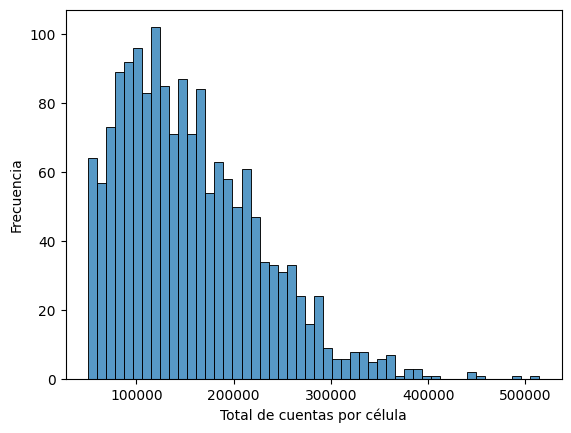

In [34]:
sns.histplot(adata_glioblastoma_norm.obs["total_counts"], bins=50)
plt.xlabel("Total de cuentas por célula")
plt.ylabel("Frecuencia")
plt.show()

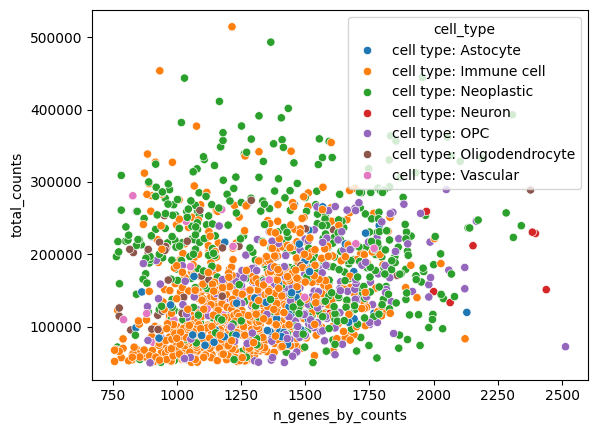

In [38]:
sns.scatterplot(data=adata_glioblastoma_norm.obs, x="n_genes_by_counts", y="total_counts", hue="cell_type")
plt.show()


pbmc3k.h5ad

Conjunto de datos de 3,000 células mononucleares de sangre periférica (PBMCs).
Se usa como referencia en análisis de expresión génica.


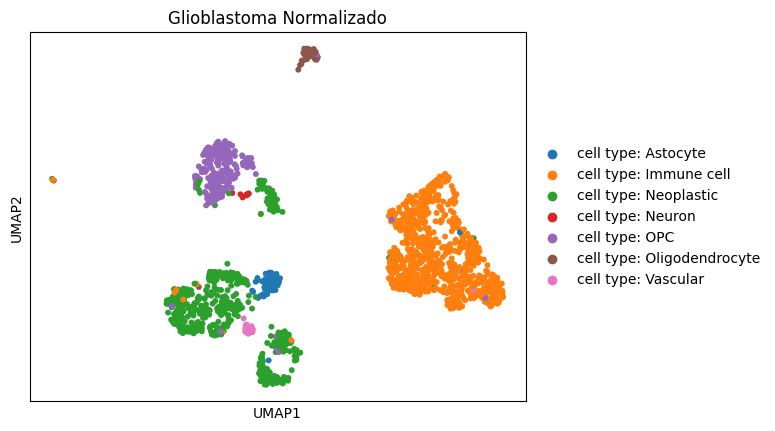

c:\Users\henry\miniconda3\envs\ml_venv\lib\site-packages\scanpy\tools\_utils.py:41: UserWarning: You’re trying to run this on 7683 dimensions of `.X`, if you really want this, set `use_rep='X'`.
         Falling back to preprocessing with `sc.pp.pca` and default params.
  warnings.warn(


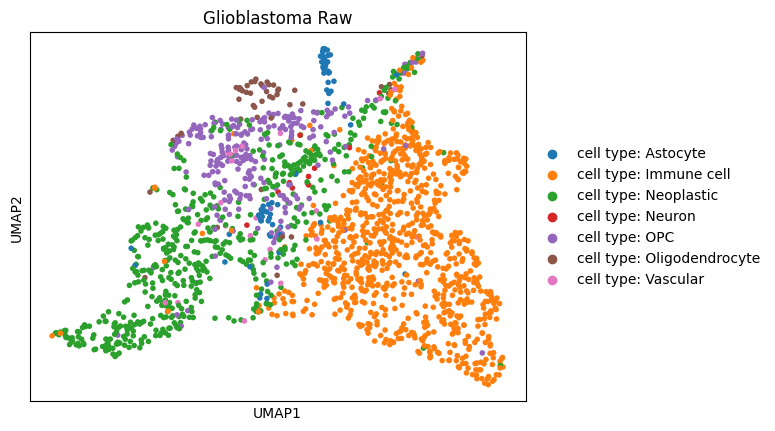

KeyError: 'Could not find key cell_type in .var_names or .obs.columns.'

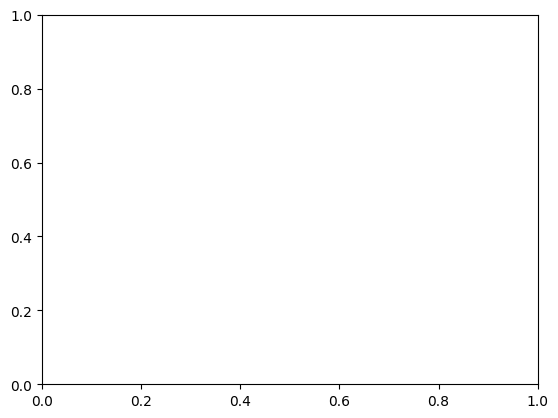

In [11]:
for adata, name in zip(
    [adata_glioblastoma_norm, adata_glioblastoma_raw, adata_pbmc3k], 
    ["Glioblastoma Normalizado", "Glioblastoma Raw", "PBMC3K"]
):
    sc.pp.neighbors(adata)   # Construir la gráfica de vecinos
    sc.tl.umap(adata)        # Calcular la reducción de dimensionalidad
    sc.pl.umap(adata, color="cell_type", title=name)  # Graficar UMAP
